In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# # from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df =pd.read_csv('/content/TRAIN.csv')

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


Exploratory Data Analysis

In [ ]:
df.shape

(188340, 10)

In [ ]:
df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
df.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [ ]:
df.columns=df.columns.str.lstrip("#").str.lower()
df.head(2)

,id,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,188340.0,183.000000,105.366308,1.0,92.0,183.0,274.0,365.0
holiday,188340.0,0.131783,0.338256,0.0,0.0,0.0,0.0,1.0
order,188340.0,68.205692,30.467415,0.0,48.0,63.0,82.0,371.0
sales,188340.0,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0


In [ ]:
df.nunique()

id               188340
store_id            365
store_type            4
location_type         5
region_code           4
date                516
holiday               2
discount              2
order               299
sales             47422
dtype: int64

In [ ]:
df.drop('id',axis=1,inplace=True)
df.sample(3)

,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
40265,179,S1,L1,R2,2018-04-21,0,Yes,65,44889.0
33228,334,S3,L2,R2,2018-04-02,0,No,76,48909.0
8326,180,S1,L3,R2,2018-01-23,0,No,43,26457.0


In [ ]:
print(df.dtypes)

store_id           int64
store_type        object
location_type     object
region_code       object
date              object
holiday            int64
discount          object
order              int64
sales            float64
dtype: object


In [ ]:
obj_df = df.select_dtypes(include=['object'])
print(obj_df.columns)

Index(['store_type', 'location_type', 'region_code', 'date', 'discount'], dtype='object')


In [ ]:
cols = obj_df.columns

for i in cols:
  print(df[i].value_counts())
  print('='*20)

S1    88752
S4    45924
S2    28896
S3    24768
Name: store_type, dtype: int64
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: location_type, dtype: int64
R1    63984
R2    54180
R3    44376
R4    25800
Name: region_code, dtype: int64
2018-01-01    365
2018-11-20    365
2018-12-20    365
2018-12-19    365
2018-12-18    365
             ... 
2018-06-16    365
2018-06-15    365
2018-06-14    365
2018-06-13    365
2019-05-31    365
Name: date, Length: 516, dtype: int64
No     104051
Yes     84289
Name: discount, dtype: int64


In [ ]:
df.sort_values("sales",ascending=False).head(15)

,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
178648,175,S4,L2,R1,2019-05-05,0,Yes,371,247215.00
178372,87,S4,L2,R3,2019-05-04,0,Yes,233,227127.00
178304,175,S4,L2,R1,2019-05-04,0,Yes,348,222516.00
63672,337,S4,L2,R1,2018-06-24,0,Yes,316,219984.00
168624,315,S4,L2,R1,2019-04-07,0,Yes,331,211914.00
178553,146,S4,L2,R1,2019-05-05,0,Yes,306,205605.00
68703,175,S4,L2,R1,2018-07-08,0,Yes,333,203337.00
155790,175,S4,L2,R1,2019-03-03,0,Yes,347,200742.00
183128,175,S4,L2,R1,2019-05-17,0,Yes,309,199839.00
183251,175,S4,L2,R1,2019-05-18,1,No,361,197840.61


In [ ]:
df.sort_values("sales",ascending=True).head(15)

,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
166849,204,S4,L1,R3,2019-04-03,0,No,0,0.0
97301,271,S1,L3,R2,2018-09-24,0,No,0,0.0
146897,276,S1,L1,R2,2019-02-07,0,No,0,0.0
119242,298,S4,L1,R1,2018-11-23,1,No,0,0.0
150650,317,S3,L1,R1,2019-02-17,0,No,0,0.0
112853,39,S4,L1,R1,2018-11-06,1,No,0,0.0
99489,12,S1,L3,R2,2018-09-30,0,No,0,0.0
99904,12,S1,L3,R2,2018-10-01,0,No,0,0.0
118972,298,S4,L1,R1,2018-11-22,0,No,0,0.0
113444,39,S4,L1,R1,2018-11-07,1,No,0,0.0


In [ ]:
df.sort_values("discount",ascending=True).head(15)

,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
94169,137,S4,L1,R1,2018-09-15,0,No,75,38004.0
110018,184,S1,L2,R2,2018-10-29,0,No,71,47508.0
110017,300,S2,L5,R2,2018-10-29,0,No,23,11490.0
110014,122,S1,L1,R2,2018-10-29,0,No,53,35577.0
110010,49,S4,L1,R2,2018-10-29,0,No,81,43785.0
110009,331,S1,L1,R4,2018-10-29,0,No,61,38607.0
110006,47,S4,L2,R2,2018-10-29,0,No,73,41136.0
110002,94,S4,L2,R2,2018-10-29,0,No,91,56931.0
110001,160,S4,L2,R1,2018-10-29,0,No,136,71862.0
110000,131,S4,L2,R1,2018-10-29,0,No,94,45840.0


In [ ]:
df.groupby("discount")["sales"].describe().T

discount,No,Yes
count,104051.000000,84289.000000
mean,37403.679678,49426.497620
std,16039.555183,19071.656642
min,0.000000,1969.140000
25%,27069.000000,36625.350000
50%,34791.000000,46242.000000
75%,44968.500000,58869.000000
max,197840.610000,247215.000000


In [ ]:
df.groupby("discount")["order"].describe().T

discount,No,Yes
count,104051.000000,84289.000000
mean,61.806153,76.105637
std,28.046407,31.467192
min,0.000000,3.000000
25%,44.000000,55.000000
50%,57.000000,70.000000
75%,74.000000,91.000000
max,361.000000,371.000000


In [ ]:
store_type = df.groupby("store_type")[["order","sales"]].describe().T

In [ ]:
store_type

store_type              S1            S2             S3             S4
order count   88752.000000  28896.000000   24768.000000   45924.000000
      mean       58.022095     40.472799      73.663396     102.392779
      std        16.349649     11.835608      19.018281      33.733548
      min         0.000000      2.000000       0.000000       0.000000
      25%        48.000000     33.000000      63.000000      81.000000
      50%        57.000000     40.000000      73.000000      98.000000
      75%        67.000000     47.000000      84.000000     119.000000
      max       189.000000    121.000000     197.000000     371.000000
sales count   88752.000000  28896.000000   24768.000000   45924.000000
      mean    37676.511694  27530.828222   47063.068209   59945.685926
      std     12303.151090   9168.839395   14907.465521   20750.228035
      min         0.000000   1748.280000       0.000000       0.000000
      25%     29859.000000  21666.000000   37656.000000   46503.000000
      50%     36444.000000  26794.500000   45445.500000   57075.000000
      75%     44439.000000  32703.900000   55062.750000   70326.750000
      max    143841.000000  96363.000000  166323.000000  247215.000000

In [ ]:
df[df.sales==247215] #highest_sales

,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
178648,175,S4,L2,R1,2019-05-05,0,Yes,371,247215.0


Data Preprocessing

In [ ]:
df.isnull().sum()

store_id         0
store_type       0
location_type    0
region_code      0
date             0
holiday          0
discount         0
order            0
sales            0
dtype: int64

In [ ]:
from datetime import datetime

In [ ]:
df['date']=pd.to_datetime(df.date)

In [ ]:
print(df.date.dtype)

datetime64[ns]


In [ ]:
df['year']=df.date.dt.year

In [ ]:
df['month']=df.date.dt.month
df['day']=df.date.dt.day

In [ ]:
monthly_order_sales =df.groupby("month")[["order","sales"]].describe().T
monthly_order_sales

month                   1              2              3              4   \
order count   22630.000000   20440.000000   22630.000000   21900.000000   
      mean       66.933672      67.453474      67.761688      68.212968   
      std        28.851544      27.955358      30.903661      31.106559   
      min         7.000000       0.000000       0.000000       0.000000   
      25%        47.000000      49.000000      48.000000      47.000000   
      50%        61.000000      62.000000      63.000000      62.000000   
      75%        80.000000      80.000000      82.000000      82.000000   
      max       305.000000     306.000000     347.000000     331.000000   
sales count   22630.000000   20440.000000   22630.000000   21900.000000   
      mean    44979.147732   40424.350645   40979.577286   40773.681352   
      std     18890.563378   15663.007346   17792.866523   17741.049089   
      min      4591.620000       0.000000       0.000000       0.000000   
      25%     31706.580000   29703.000000   29526.750000   28767.000000   
      50%     41733.000000   37707.000000   38698.035000   37079.610000   
      75%     54608.250000   48303.750000   50339.250000   48943.500000   
      max    186444.000000  189174.000000  200742.000000  211914.000000   

month                   5              6              7              8   \
order count   22630.000000   10950.000000   11315.000000   11315.000000   
      mean       71.100044      66.174155      76.048873      67.128502   
      std        31.454542      28.861483      33.686867      28.912829   
      min         8.000000       8.000000      10.000000       6.000000   
      25%        50.000000      47.000000      53.000000      47.000000   
      50%        64.000000      60.000000      68.000000      62.000000   
      75%        85.000000      79.000000      91.000000      81.000000   
      max       371.000000     316.000000     333.000000     290.000000   
sales count   22630.000000   10950.000000   11315.000000   11315.000000   
      mean    48115.830407   44705.726389   46585.406232   40020.368869   
      std     20116.715253   18582.035516   19577.964004   16343.575156   
      min      4737.000000    4878.000000    5646.000000    3421.440000   
      25%     34461.000000   32004.750000   32923.500000   28681.500000   
      50%     44322.000000   41283.000000   42267.000000   37663.740000   
      75%     57480.172500   53550.000000   56059.500000   48621.000000   
      max    247215.000000  219984.000000  203337.000000  169908.000000   

month                   9              10             11             12  
order count   10950.000000   11315.000000   10950.000000   11315.000000  
      mean       68.509954      65.460009      63.416438      69.479806  
      std        28.907884      29.021450      33.601365      31.205532  
      min         0.000000       0.000000       0.000000       2.000000  
      25%        49.000000      45.000000      44.000000      50.000000  
      50%        63.000000      60.000000      60.000000      65.000000  
      75%        82.000000      79.000000      80.000000      84.000000  
      max       304.000000     245.000000     296.000000     290.000000  
sales count   10950.000000   11315.000000   10950.000000   11315.000000  
      mean    41123.184822   38988.407398   38160.962496   46477.110199  
      std     16460.132331   16226.188885   19719.378047   20188.802124  
      min         0.000000       0.000000       0.000000    1969.140000  
      25%     29823.750000   27523.500000   26642.100000   33504.000000  
      50%     38202.000000   36294.000000   36469.500000   43659.000000  
      75%     49631.760000   47499.000000   48780.000000   56931.000000  
      max    182586.000000  135630.000000  183906.000000  187077.000000

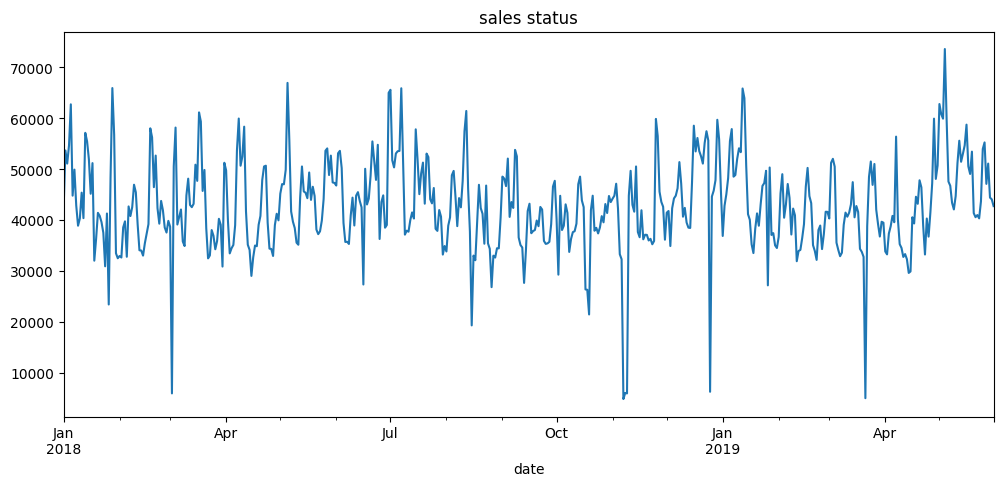

In [ ]:
custgroup=df.groupby('date').mean()
plt.figure(figsize=(12,5))
custgroup['sales'].plot(x=df.date)
plt.title("sales status")
plt.show()

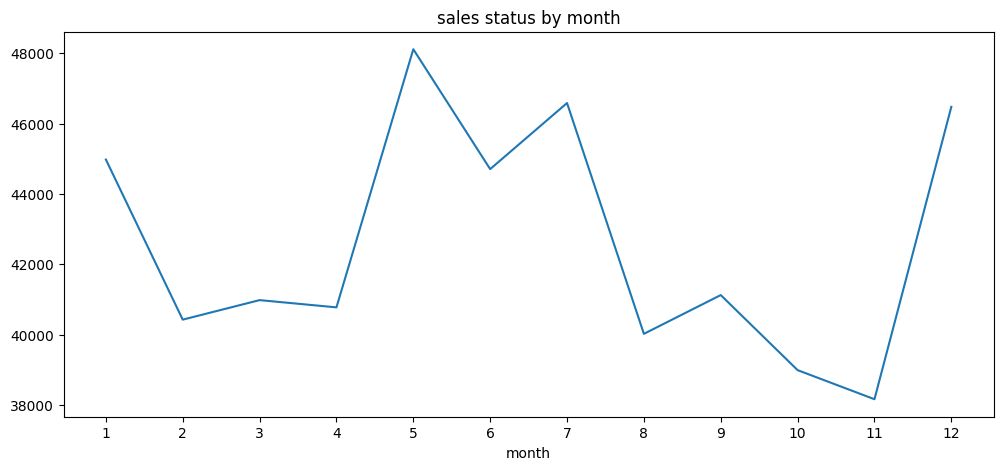

In [ ]:
custgroup=df.groupby('month').mean()
fig,ax=plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13))
custgroup['sales'].plot(x=df.date)
plt.title("sales status by month")
plt.show()

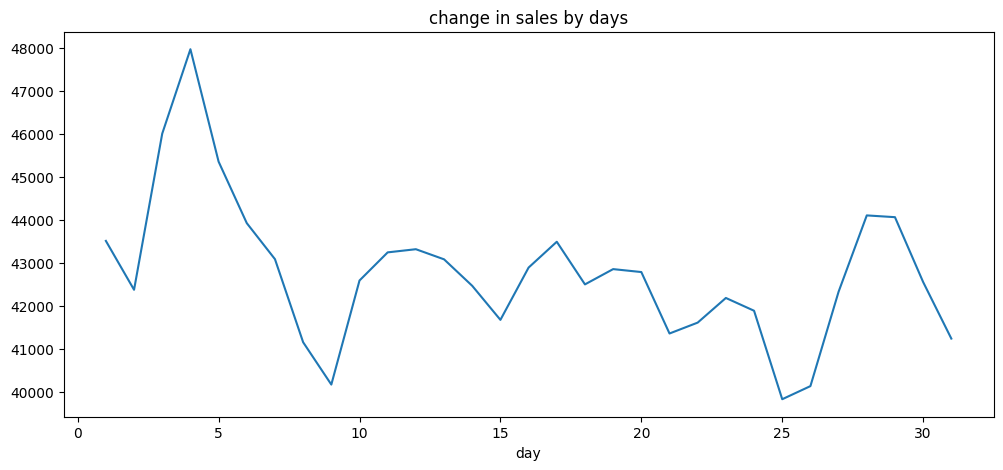

In [ ]:
custgroup=df.groupby('day').mean()
plt.figure(figsize=(12,5))
custgroup['sales'].plot(x=df.date)
plt.title("change in sales by days")
plt.show()

In [ ]:
cat_features=[]
num_features=[]

for i in df.columns:
    unique_val=len(df[i].unique())

    if unique_val<32:
        cat_features.append(i)
    else:
        num_features.append(i)

In [ ]:
print(cat_features,'\n',num_features)

['store_type', 'location_type', 'region_code', 'holiday', 'discount', 'year', 'month', 'day'] 
 ['store_id', 'date', 'order', 'sales']


Distribution of Numerical features

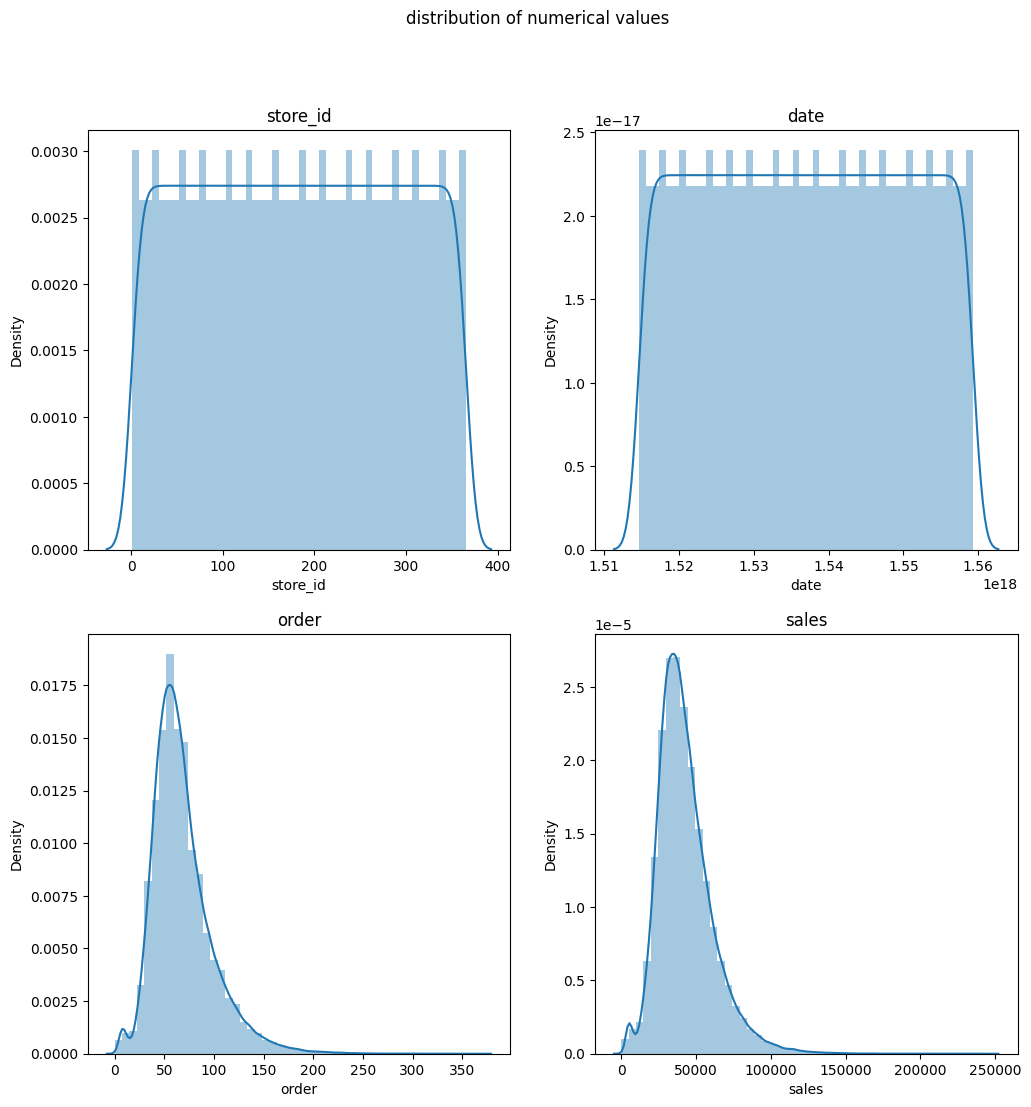

In [ ]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in df.loc[:,num_features]:
    plt.subplot(2,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

Categorical Analysis

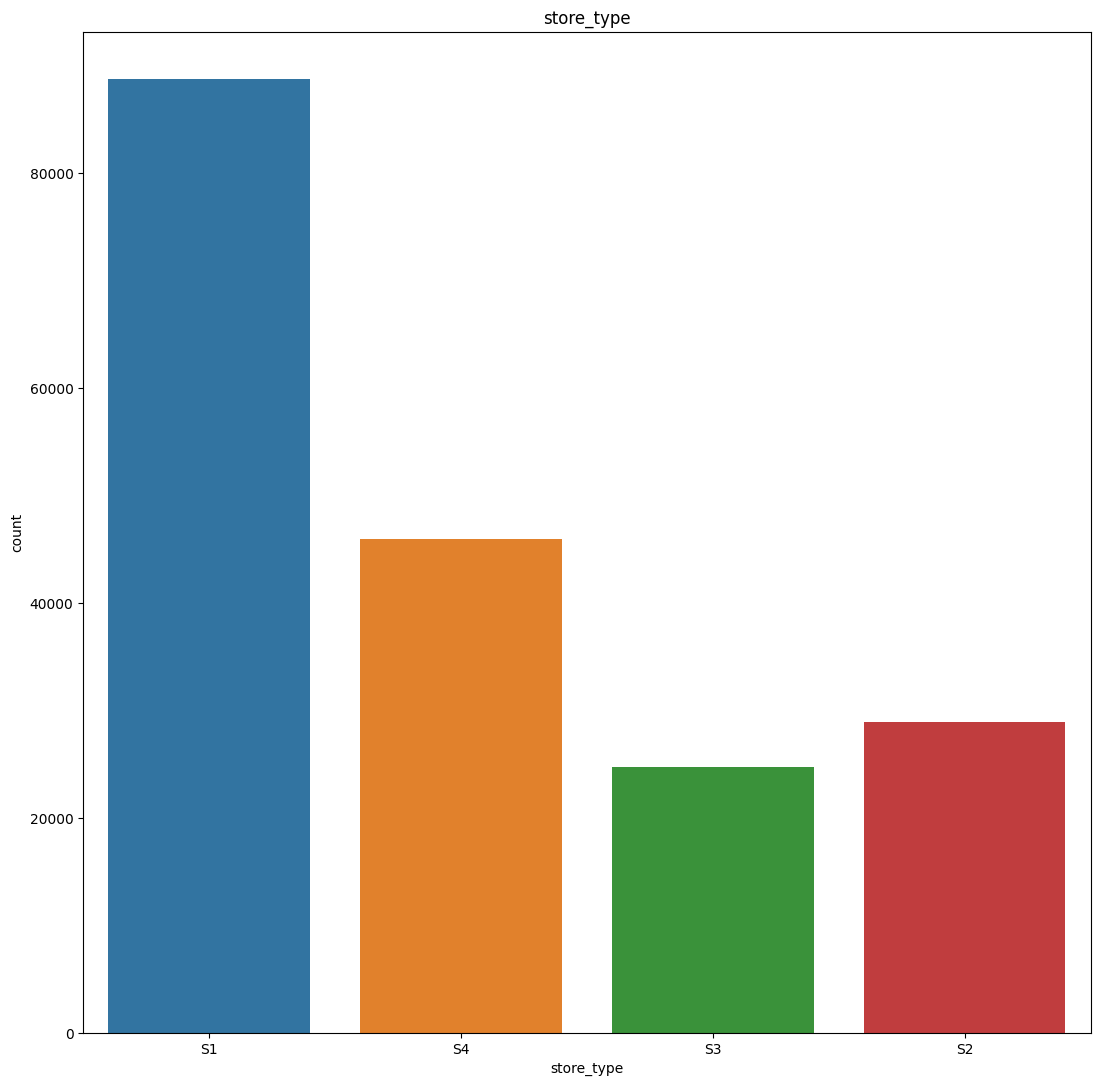

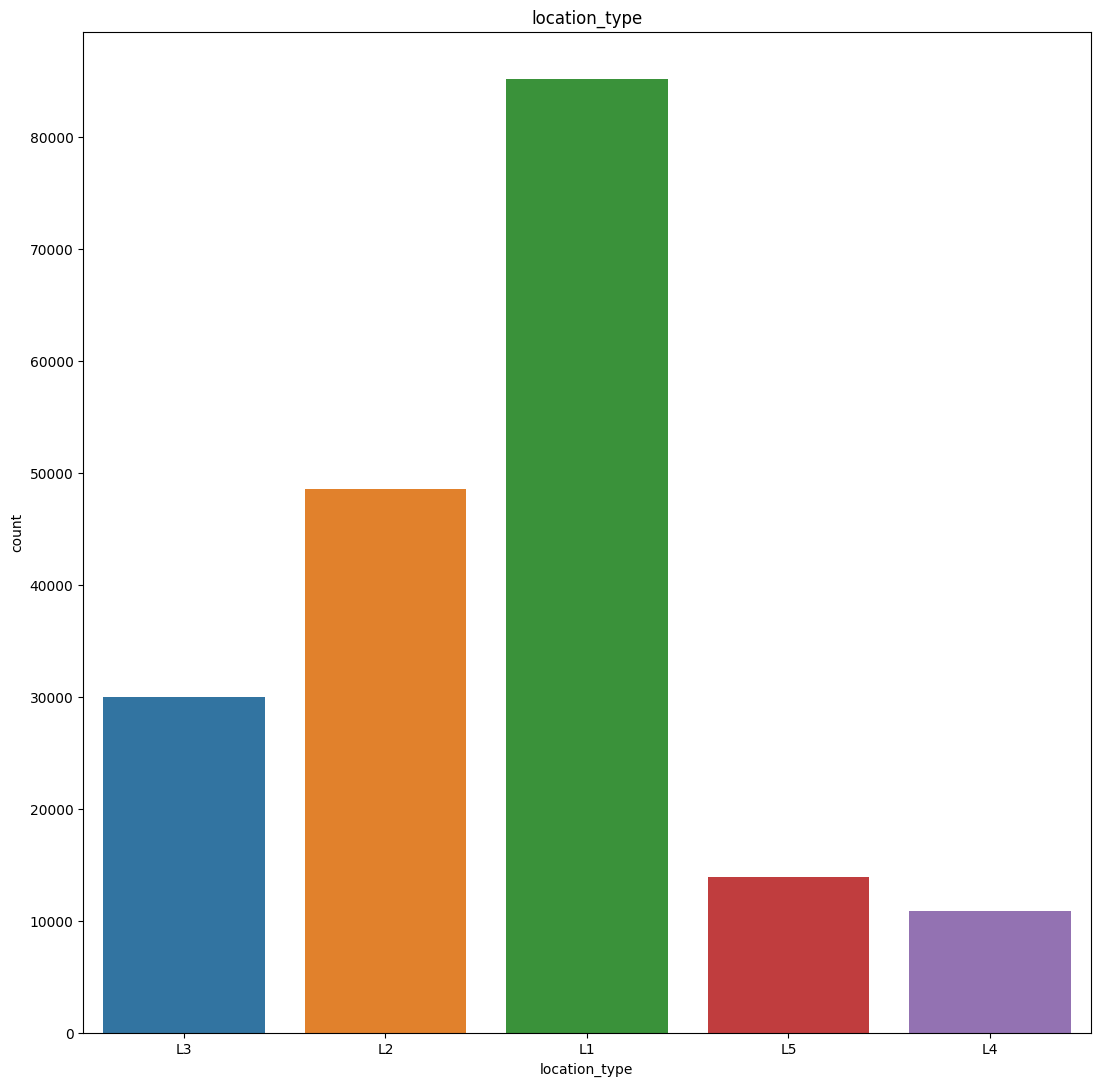

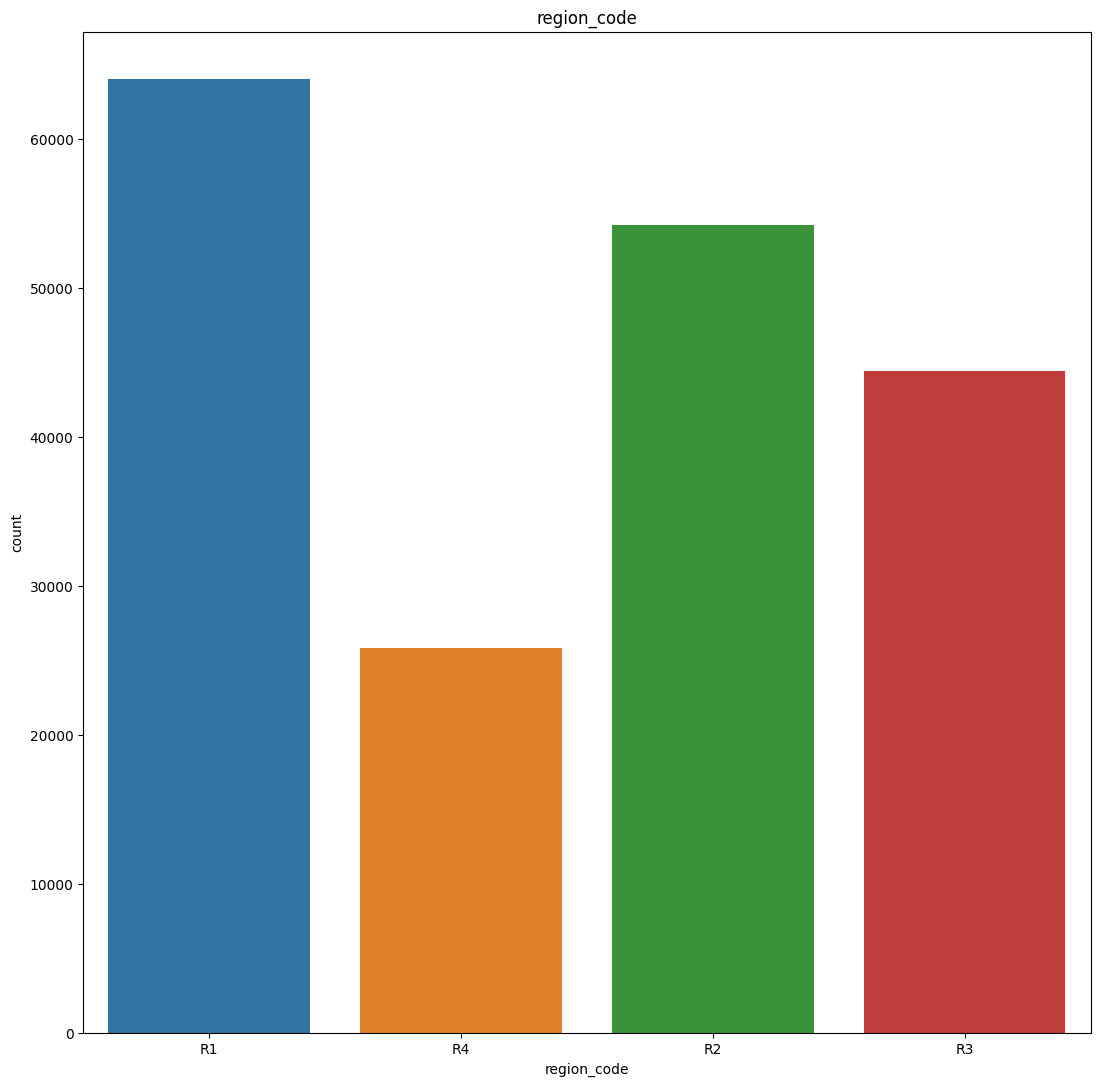

In [ ]:
for i in cat_features:

    plt.figure(figsize=(13,13))
    sns.countplot(x=i,data=df.loc[:,cat_features])
    plt.title(i)

In [ ]:
fig = px.pie(df, values='year', names='year')
fig.show()

In [ ]:
df["discount"].value_counts().plot(kind="pie",autopct="%.2f");

In [ ]:

sns.pairplot(df.loc[:,num_features]);

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.scatterplot(x ='order',y ='sales',hue="year",data = df)
plt.subplot(3,2,2)
sns.boxplot(x ='location_type',y ='sales',hue="year",data = df)
plt.subplot(3,2,3)
sns.barplot(x ='discount',y ='order',hue="holiday",data = df)
plt.subplot(3,2,4)
sns.barplot(x ='location_type',y ='order',hue="year",data = df)
plt.subplot(3,2,5)
sns.violinplot(x ='month',y ='sales',data = df)
plt.subplot(3,2,6)
sns.violinplot(x ='store_type',y ='sales',data = df)

In [ ]:
df_2 = df.copy()
df_2.head()

In [ ]:
df.drop("date",inplace=True,axis=1)

Feature Encoding

In [ ]:
dms =pd.get_dummies(df[["discount","region_code","location_type", "store_type"]])
dms

In [ ]:
df.drop(["discount","region_code","location_type","store_type"],
        axis=1,inplace=True)
df.head()

In [ ]:
df=pd.concat([df,dms],axis=1)
df.head()

Correlation Analysis

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()


In [ ]:
df.drop("discount_Yes",axis=1,inplace=True)
df.head()

,store_id,holiday,order,sales,year,month,day,discount_No,region_code_R1,region_code_R2,...,region_code_R4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,store_type_S1,store_type_S2,store_type_S3,store_type_S4
0,1,1,9,7011.84,2018,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,253,1,60,51789.12,2018,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,252,1,42,36868.20,2018,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,251,1,23,19715.16,2018,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,250,1,62,45614.52,2018,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
cor=df.corr()["order"].sort_values(ascending=False)
cor_df=pd.DataFrame({"column":cor.index,"Correlation with order":cor.values})
cor_df

,column,Correlation with order
0,order,1.000000
1,sales,0.941601
2,store_type_S4,0.637189
3,location_type_L2,0.515078
4,region_code_R1,0.268874
5,store_type_S3,0.069705
6,store_id,0.028290
7,year,0.022860
8,month,-0.002864
9,day,-0.017951


Modeling

In [ ]:
X_order = df.drop('order',axis=1)
y_order=df['order']

In [ ]:
X_order.head()

,store_id,holiday,sales,year,month,day,discount_No,region_code_R1,region_code_R2,region_code_R3,region_code_R4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,store_type_S1,store_type_S2,store_type_S3,store_type_S4
0,1,1,7011.84,2018,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,253,1,51789.12,2018,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,252,1,36868.20,2018,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,251,1,19715.16,2018,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,250,1,45614.52,2018,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
X_order.isna().sum()

store_id            0
holiday             0
sales               0
year                0
month               0
day                 0
discount_No         0
region_code_R1      0
region_code_R2      0
region_code_R3      0
region_code_R4      0
location_type_L1    0
location_type_L2    0
location_type_L3    0
location_type_L4    0
location_type_L5    0
store_type_S1       0
store_type_S2       0
store_type_S3       0
store_type_S4       0
dtype: int64

In [ ]:
y_order.isna().sum()

0

In [ ]:
X_order=X_order.dropna()
y_order=y_order.dropna()

In [ ]:
X_tr,X_te,y_tr,y_te = train_test_split(X_order,y_order,test_size=0.25,random_state=0)

In [ ]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(141255, 20)
(47085, 20)
(141255,)
(47085,)


In [ ]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)


LinearRegression()

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_tr,y_tr)

KNeighborsRegressor()

In [ ]:
dtc = DecisionTreeRegressor()
dtc.fit(X_tr,y_tr)

DecisionTreeRegressor()

In [ ]:
# rf = RandomForestRegressor()
# rf.fit(X_tr,y_tr)

RandomForestRegressor()

In [ ]:
models =[lr,knn,dtc]

In [ ]:
# knn=KNeighborsRegressor().fit(X_tr,y_tr)
# dtc=DecisionTreeRegressor().fit(X_tr,y_tr)
# rf=RandomForestRegressor().fit(X_tr,y_tr)
# # svm=SVR().fit(X_tr,y_tr)
# models =[lr,knn,dtc,rf,svm]

In [ ]:
def ML(y,models):
    accuary=models.score(X_tr,y_tr)
    return accuary

#     for i in models:
#      print(i,"Algorithm succed rate :",ML("order",i))

In [ ]:
for i in models:
    print(i,"Algorithm succed rate :",ML("order",i))

In [ ]:
preds_lr = lr.predict(X_te)
preds_knn = knn.predict(X_te)
# preds_rf = rf.predict(X_te)
preds_dtc = dtc.predict(X_te)

In [ ]:
mae_lr = mean_squared_error(y_te,preds_lr)
# mae_rf = mean_squared_error(y_te,preds_rf)
mae_dtc = mean_squared_error(y_te,preds_dtc)
mae_knn = mean_squared_error(y_te,preds_knn)


In [ ]:
mae = np.arange(mae_lr,mae_dtc,mae_knn)

In [ ]:
mae

In [ ]:
Predicted_order =pd.DataFrame({'Predicted_Quantity':preds_knn,'year':X_te['year']})

In [ ]:
Predicted_order

,Predicted_Quantity,year
126939,112.8,2018
91114,33.8,2018
100267,31.8,2018
187376,51.2,2019
147934,59.8,2019
...,...,...
72207,85.0,2018
40266,72.6,2018
107161,157.8,2018
121338,54.8,2018


In [ ]:
Predicted_order['Predicted_Quantity'] = Predicted_order['Predicted_Quantity'].astype('int')

In [ ]:
Predicted_order

In [ ]:
Predicted_order.shape

In [ ]:
X_te.columns

In [ ]:
new_df = pd.merge(X_te,Predicted_order,on='year',how='right')

In [ ]:
new_df

In [ ]:
new_df.shape